In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [2]:
apps = pd.read_csv('apps.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


In [4]:
apps.describe()

,Unnamed: 0,Rating,Reviews
count,9659.000000,8196.000000,9.659000e+03
mean,5666.172896,4.173243,2.165926e+05
std,3102.362863,0.536625,1.831320e+06
min,0.000000,1.000000,0.000000e+00
25%,3111.500000,4.000000,2.500000e+01
50%,5814.000000,4.300000,9.670000e+02
75%,8327.500000,4.500000,2.940100e+04
max,10840.000000,5.000000,7.815831e+07


In [5]:
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Number of categories =  33


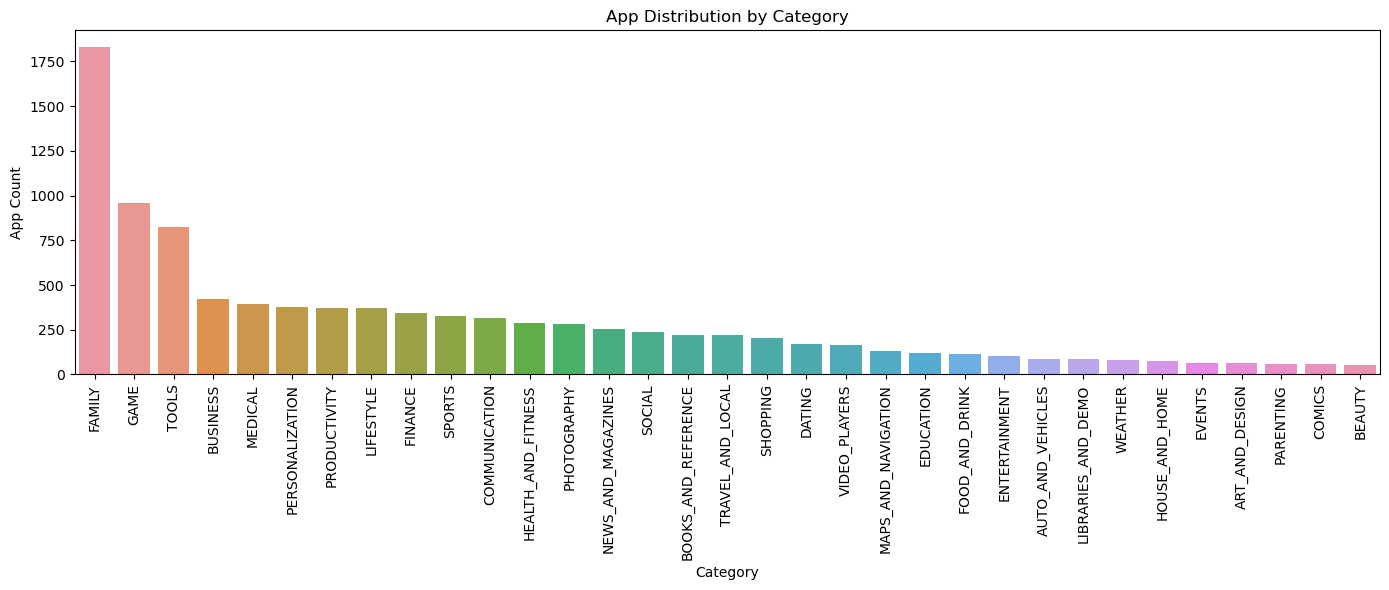

In [22]:
num_categories = len(set(apps['Category']))
print('Number of categories = ', num_categories)

category_df = num_apps_in_category.reset_index()
category_df.columns = ['Category', 'App Count']

plt.figure(figsize=(14,6))
sns.barplot(data=category_df, x='Category', y='App Count')
plt.xticks(rotation=90)
plt.title('App Distribution by Category')
plt.tight_layout()
plt.show()


Average app rating = 4.17


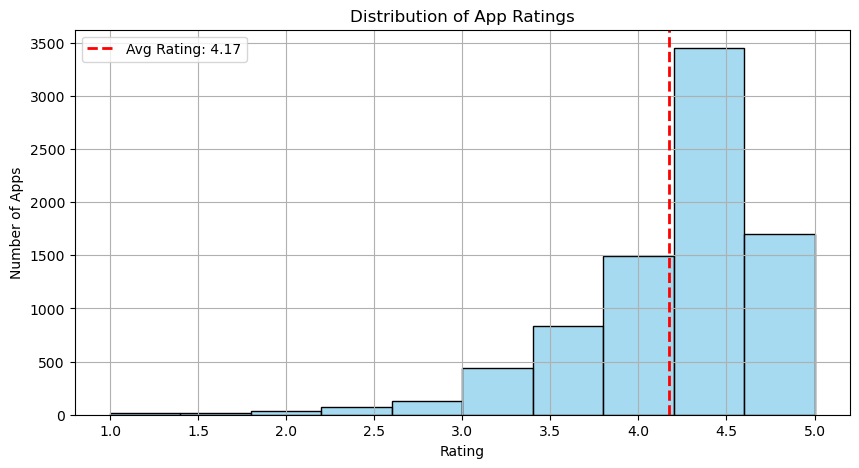

In [27]:
ratings = apps['Rating'].dropna()

# Calculate average
avg_app_rating = ratings.mean()
print('Average app rating =', round(avg_app_rating, 2))

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(ratings, bins=10, kde=False, color='skyblue')
plt.axvline(avg_app_rating, color='red', linestyle='--', linewidth=2, label=f'Avg Rating: {avg_app_rating:.2f}')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Replace 'Varies with device' with NaN
apps['Size'] = apps['Size'].replace('Varies with device', np.nan)

# Remove 'M' and 'k', and convert to numeric (MB and kB to MB)
def size_to_mb(size):
    if pd.isna(size):
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan

apps['Size'] = apps['Size'].apply(size_to_mb)

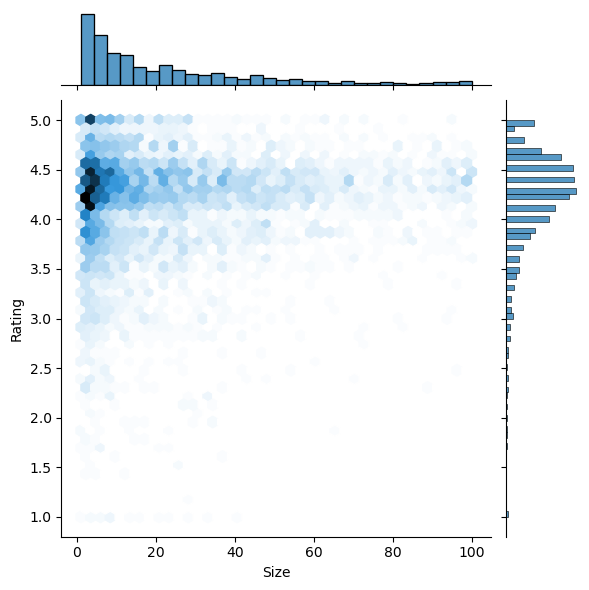

In [34]:
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()
sns.jointplot(x='Size', y='Rating', data=large_categories, kind='hex')

[]

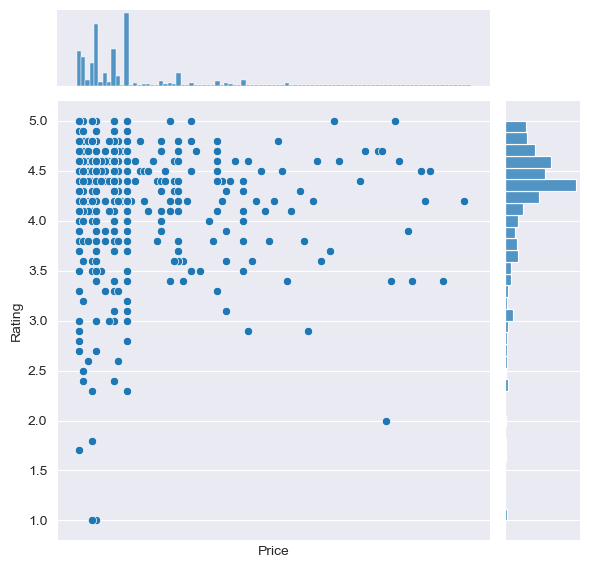

In [43]:
sns.set_style("darkgrid")

# Subset for paid apps only
paid_apps = apps[apps['Type'] == 'Paid']

# Store the jointplot in a variable
plot = sns.jointplot(x='Price', y='Rating', data=paid_apps)

# Remove x-axis ticks and labels
plot.ax_joint.set_xticks([])            # Removes the ticks
plot.ax_joint.set_xticklabels([])       # Removes the tick labels

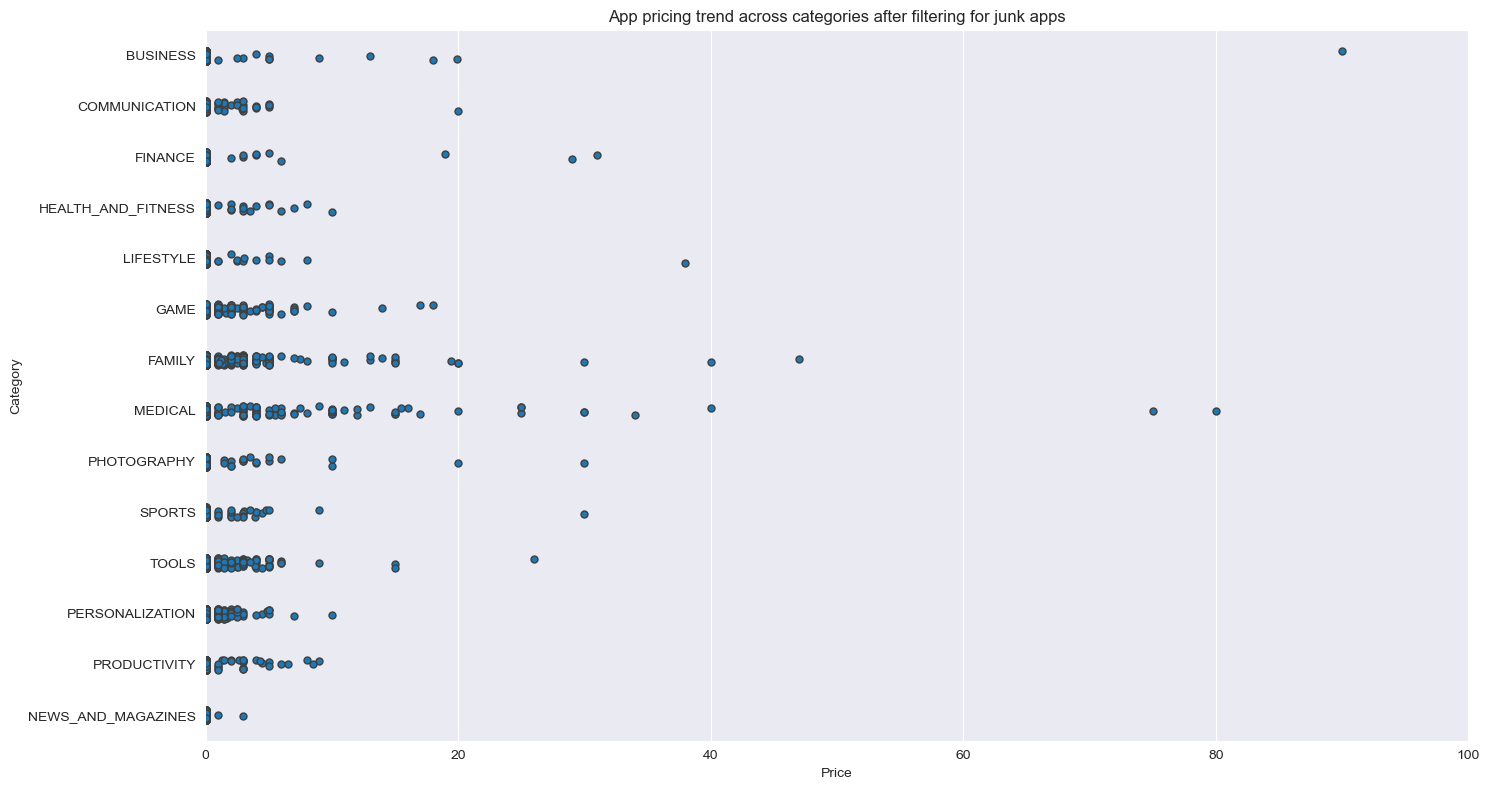

In [49]:
# Clean and convert price
large_categories['Price'] = large_categories['Price'].str.replace(r'[$]', '', regex=True).astype(float)

# Filter apps with price under 100
apps_under_100 = large_categories[large_categories['Price'] < 100]

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Stripplot: Price vs. Category
sns.stripplot(x='Price', y='Category', data=apps_under_100,
              jitter=True, linewidth=1, ax=ax)

# Add title
ax.set_title('App pricing trend across categories after filtering for junk apps')

# Improve layout
ax.set_xlim(0, 100)
plt.tight_layout()
plt.show()

In [ ]:
# Clean 'Installs' column: remove commas and plus signs, then convert to int
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)

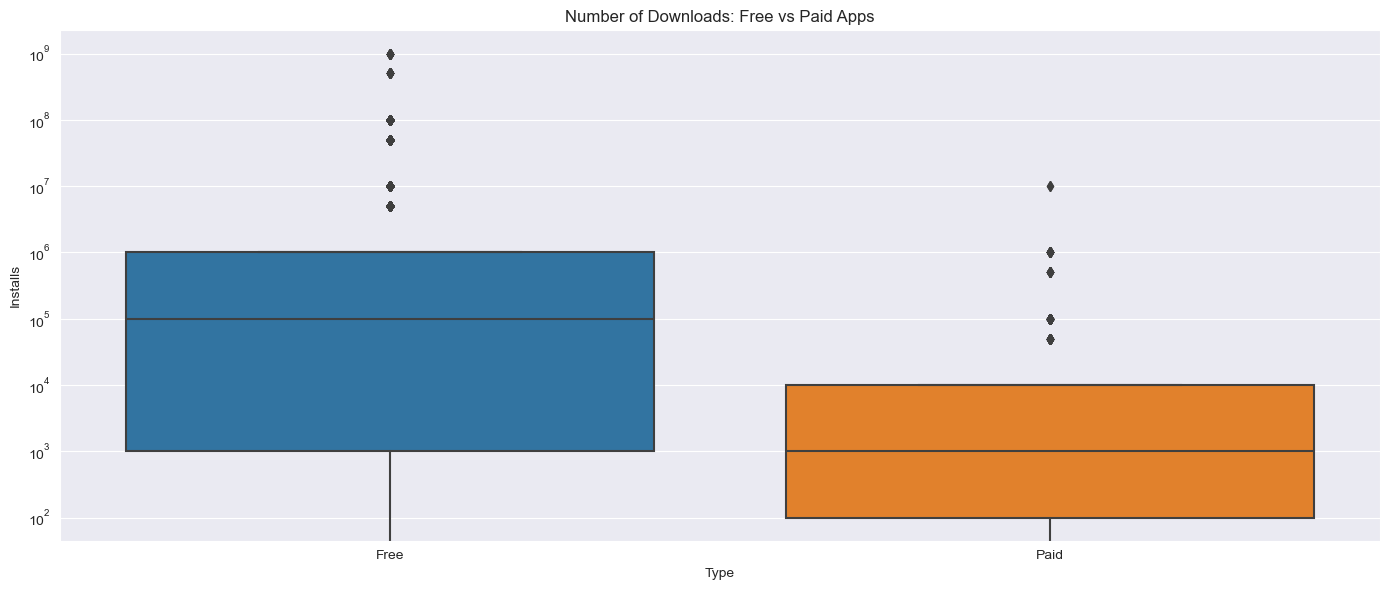

In [59]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=apps, x='Type', y='Installs')
plt.title('Number of Downloads: Free vs Paid Apps')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [60]:
# Clean review data
reviews.dropna(subset=['Translated_Review'], inplace=True)
reviews = reviews[~reviews['Translated_Review'].isin([''])]

In [61]:
# Feature engineering
reviews['review_length'] = reviews['Translated_Review'].apply(lambda x: len(str(x).split()))
reviews['polarity'] = reviews['Translated_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews['subjectivity'] = reviews['Translated_Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [62]:
df = pd.merge(reviews, apps[['App', 'Category']], how='left', on='App')
df.dropna(subset=['Category'], inplace=True)

In [63]:
scaler = MinMaxScaler()
df[['polarity_norm', 'subjectivity_norm']] = scaler.fit_transform(df[['polarity', 'subjectivity']])

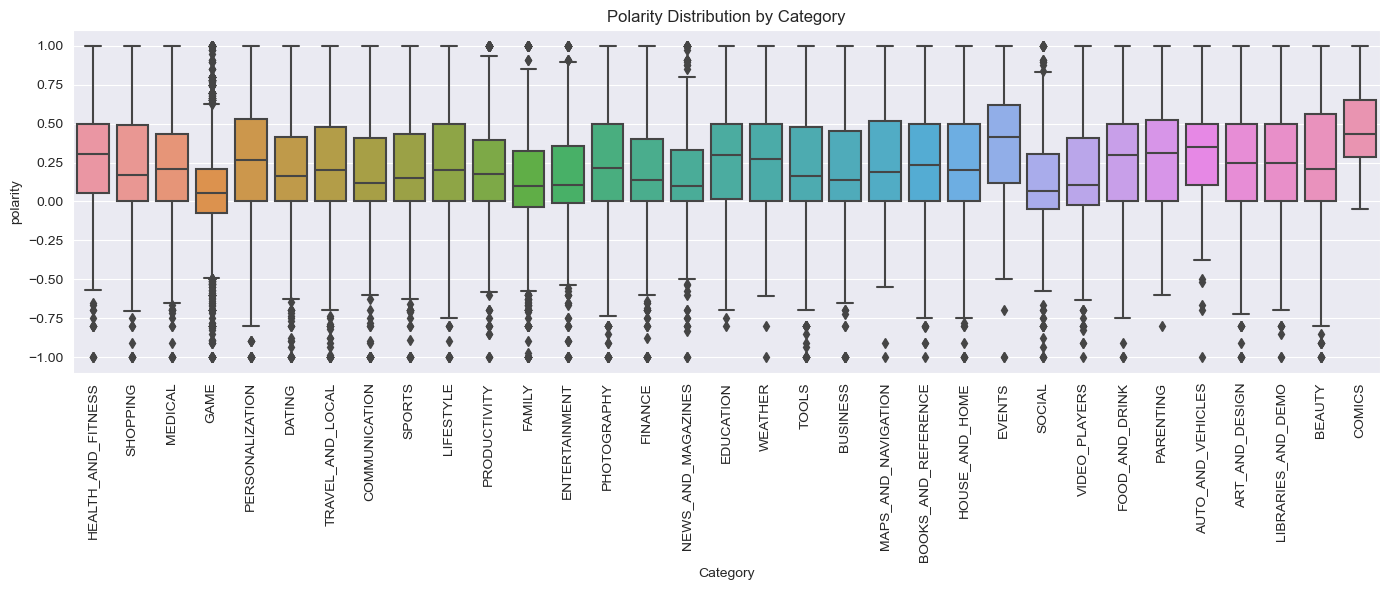

In [64]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Category', y='polarity')
plt.xticks(rotation=90)
plt.title('Polarity Distribution by Category')
plt.tight_layout()
plt.show()

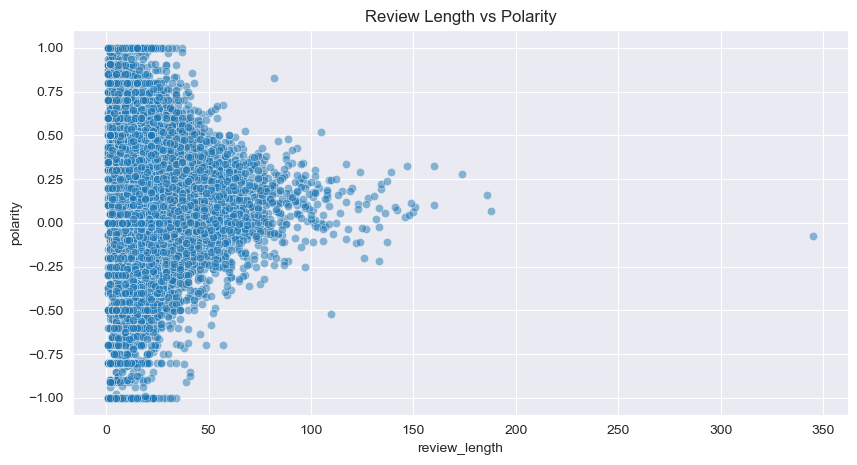

In [66]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='review_length', y='polarity', alpha=0.5)
plt.title('Review Length vs Polarity')
plt.grid(True)
plt.show()

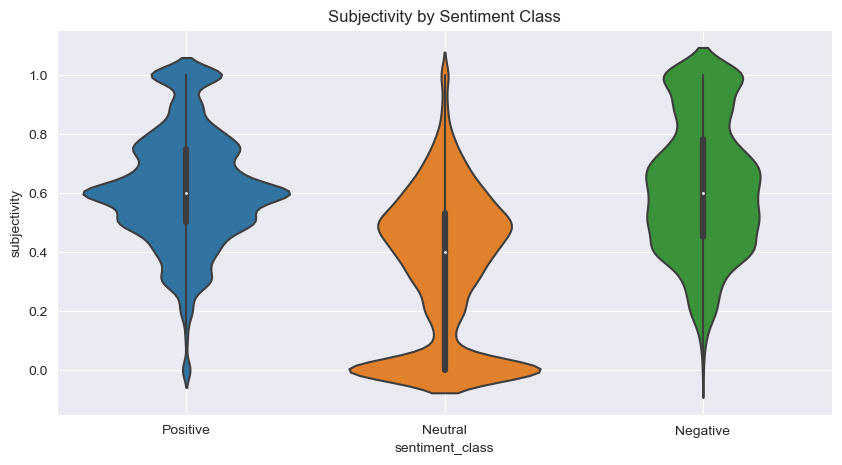

In [67]:
df['sentiment_class'] = df['polarity'].apply(lambda x: 'Positive' if x > 0.2 else ('Negative' if x < -0.2 else 'Neutral'))

plt.figure(figsize=(10,5))
sns.violinplot(x='sentiment_class', y='subjectivity', data=df)
plt.title('Subjectivity by Sentiment Class')
plt.grid(True)
plt.show()

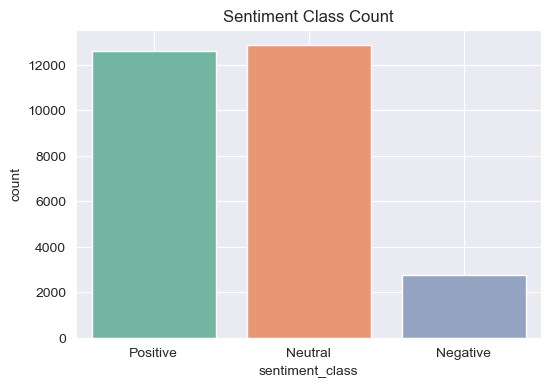

In [68]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_class', data=df, palette='Set2')
plt.title("Sentiment Class Count")
plt.grid(True)
plt.show()

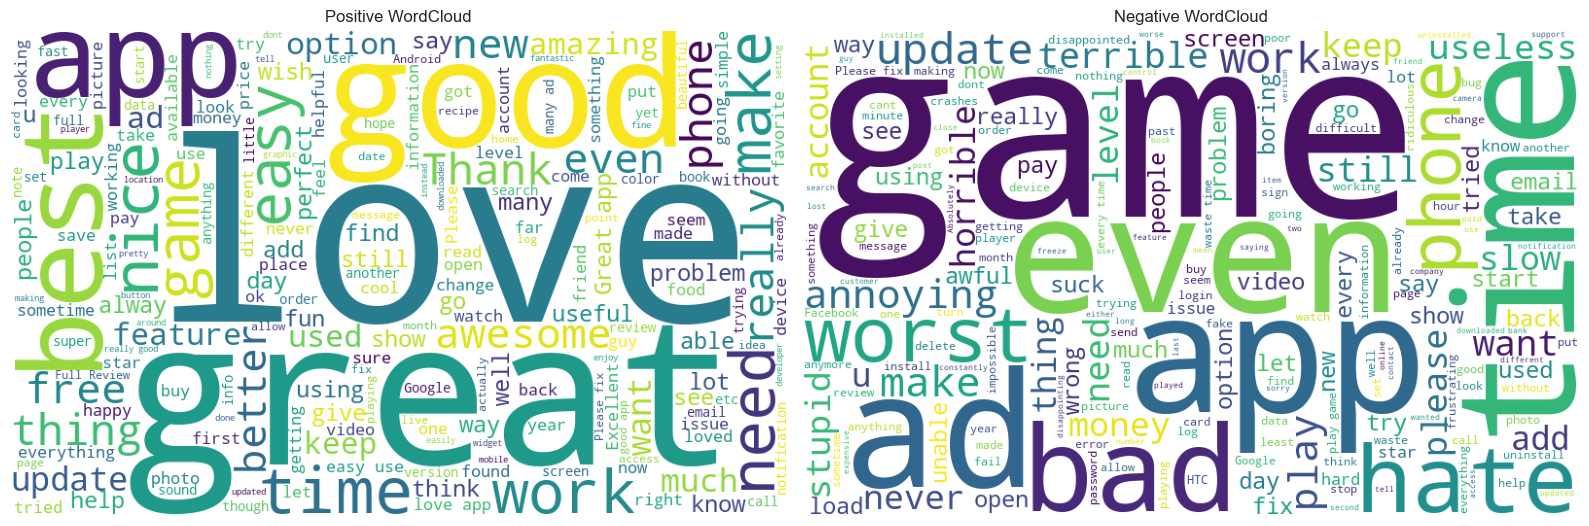

In [69]:
positive_text = " ".join(df[df['sentiment_class'] == 'Positive']["Translated_Review"])
negative_text = " ".join(df[df['sentiment_class'] == 'Negative']["Translated_Review"])

fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].imshow(WordCloud(width=800, height=500, background_color='white').generate(positive_text))
ax[0].set_title("Positive WordCloud")
ax[0].axis('off')

ax[1].imshow(WordCloud(width=800, height=500, background_color='white').generate(negative_text))
ax[1].set_title("Negative WordCloud")
ax[1].axis('off')
plt.tight_layout()
plt.show()

In [71]:
# Ensure numeric types
df['polarity'] = pd.to_numeric(df['polarity'], errors='coerce')
df['subjectivity'] = pd.to_numeric(df['subjectivity'], errors='coerce')
df['review_length'] = pd.to_numeric(df['review_length'], errors='coerce')

# Drop rows with NaN values in those columns
corr_df = df[['polarity', 'subjectivity', 'review_length']].dropna()

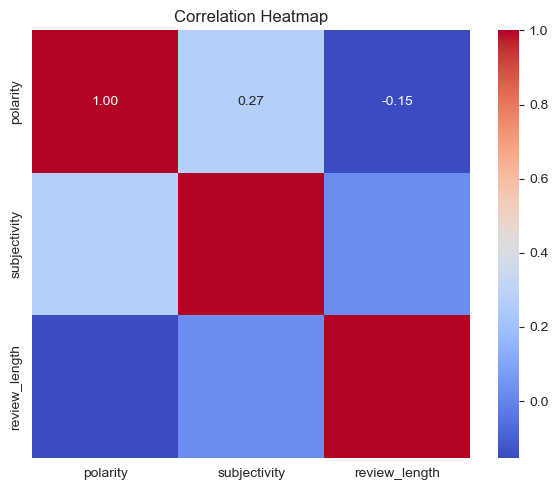

In [72]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()